Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
40/40 - 0s - loss: 2.7386 - mae: 1.4430 - 316ms/epoch - 8ms/step
Epoch 2/100
40/40 - 0s - loss: 0.4723 - mae: 0.5596 - 56ms/epoch - 1ms/step
Epoch 3/100
40/40 - 0s - loss: 0.1845 - mae: 0.3577 - 39ms/epoch - 987us/step
Epoch 4/100
40/40 - 0s - loss: 0.1399 - mae: 0.3175 - 41ms/epoch - 1ms/step
Epoch 5/100
40/40 - 0s - loss: 0.1243 - mae: 0.2999 - 40ms/epoch - 996us/step
Epoch 6/100
40/40 - 0s - loss: 0.1138 - mae: 0.2870 - 40ms/epoch - 1ms/step
Epoch 7/100
40/40 - 0s - loss: 0.1044 - mae: 0.2742 - 40ms/epoch - 993us/step
Epoch 8/100
4

Epoch 99/100
40/40 - 0s - loss: 0.0110 - mae: 0.0853 - 43ms/epoch - 1ms/step
Epoch 100/100
40/40 - 0s - loss: 0.0110 - mae: 0.0852 - 34ms/epoch - 845us/step


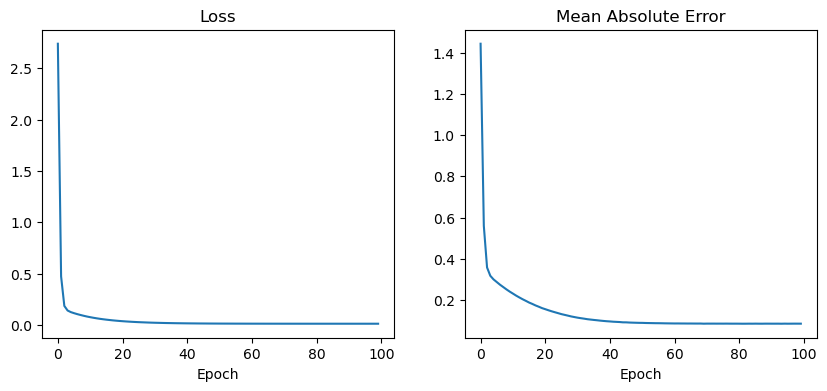

In [2]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np

# Tạo dữ liệu giả định với 200 mẫu 
data_size = 200

x_train = np.random.rand(data_size, 1) 
y_train = 2 * x_train + 1 + np.random.randn(data_size, 1) * 0.1

# Tạo mô hình đơn giản 
model = keras.Sequential ([ keras.layers.Dense (1, input_shape=(1,)) ])

# Biên dịch mô hình 
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# In thông tin tóm tắt về mô hình

model.summary()

# Huấn luyện mô hình với kích cỡ batch là 5 và 100 epoch

batch_size = 5 
epochs = 100

history = model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, verbose=2)

# Hiển thị kết quả huấn luyện 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.plot(history.history['loss'])

plt.title('Loss')

plt.xlabel('Epoch')

plt.subplot(1, 2, 2)

plt.plot(history.history['mae']) 
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.show()



In [6]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
layer_1 = Dense(16, input_shape=(8,8))
model.add(layer_1)
layer_2 = Flatten()
model.add(layer_2)
layer_2.input_shape
model.summary()

chấm chấm:
---------------
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8, 16)             144       
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
Total params: 144 (576.00 Byte)
Trainable params: 144 (576.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 7.4


# 5.1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


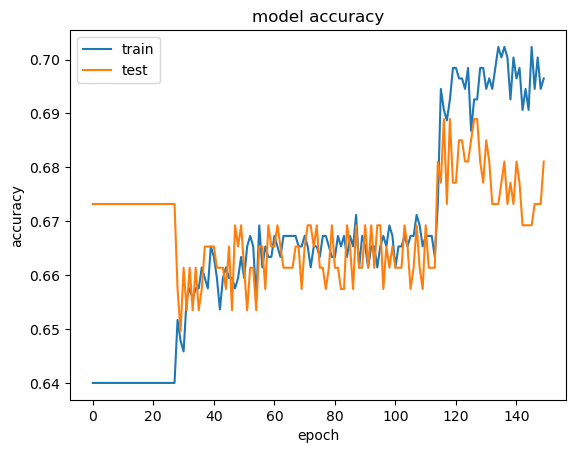

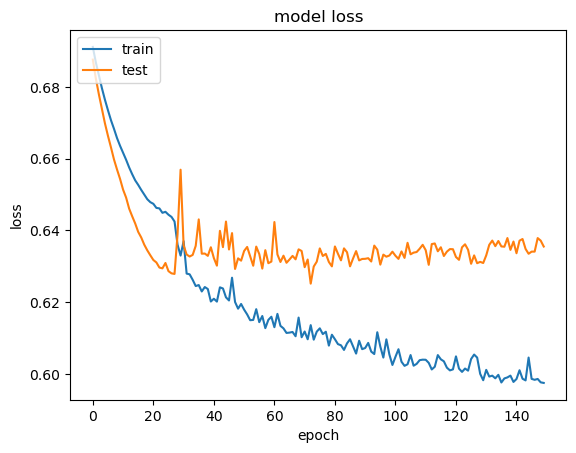

In [3]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]

# create model
model = Sequential()

# Định nghĩa các lớp layers
layer_1 = Dense(5, input_dim=8, activation='relu')
layer_2 = Dense(4, activation='relu')
layer_3 = Dense(2, activation='relu')
output_layer = Dense(1, activation='sigmoid')

# Thêm các lớp layers vào mô hình sử dụng model.add(layer)
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(output_layer)

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# 5.2

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 5s 6ms/step - loss: 0.6656 - acc: 0.6314 - val_loss: 0.6123 - val_acc: 0.6938
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.5370 - acc: 0.7488 - val_loss: 0.5237 - val_acc: 0.7262
Epoch 3/10
625/6

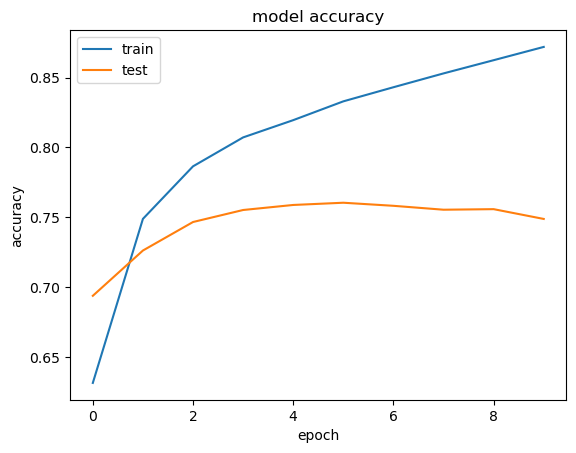

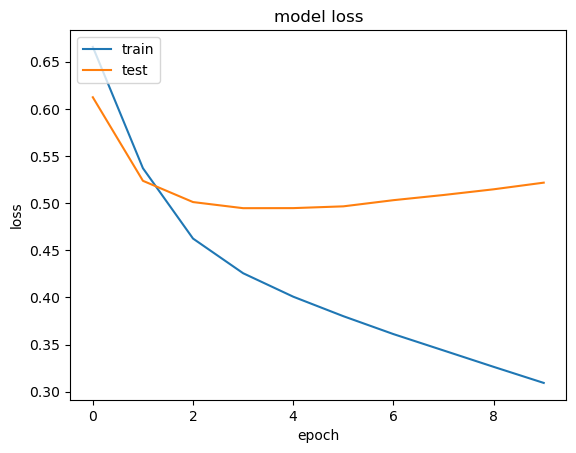

In [10]:
from keras.datasets import imdb
from keras import preprocessing
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()

# Định nghĩa các lớp layers
layer_1 = Embedding(10000, 8, input_length=maxlen)
layer_2 = Flatten()
output_layer = Dense(1, activation='sigmoid')

# Thêm các lớp layers vào mô hình sử dụng model.add(layer)
model.add(layer_1)
model.add(layer_2)
model.add(output_layer)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


 # 7.5 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


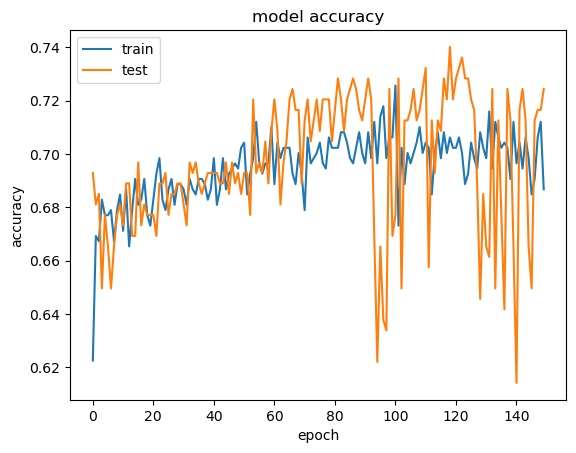

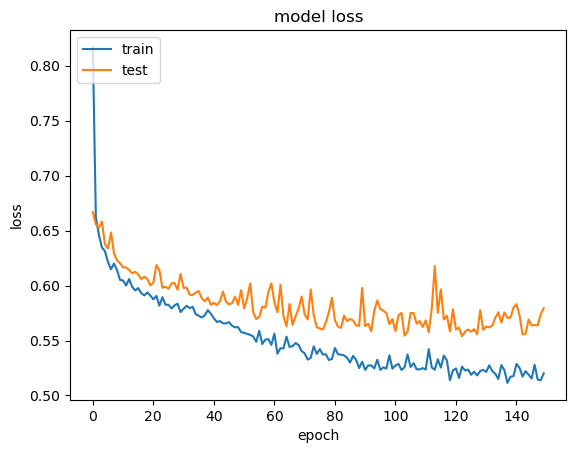

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]

# create model
model = Sequential()

# Định nghĩa các lớp layers
layer_1 = Dense(12, input_dim=8, activation='relu')
layer_2 = Dense(8, activation='relu')
layer_3 = Dense(4, activation='relu')
layer_4 = Dense(16, activation='relu')
output_layer = Dense(1, activation='sigmoid')

# Thêm các lớp layers vào mô hình sử dụng model.add(layer)
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(output_layer)

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# 7.5 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


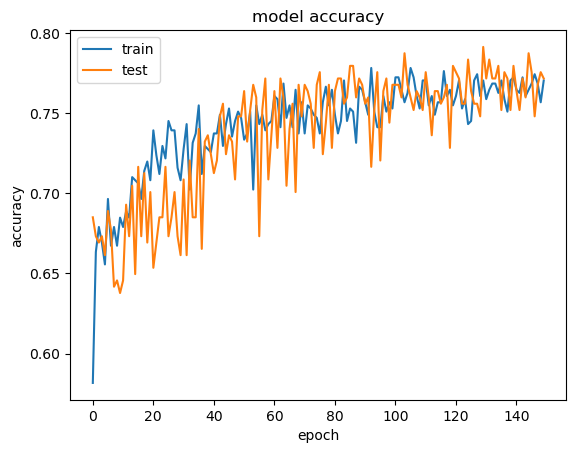

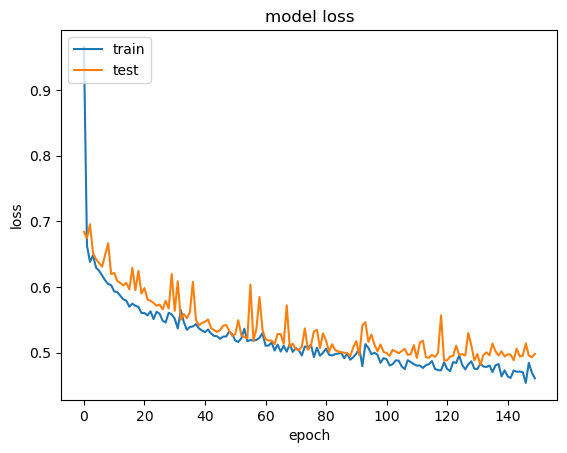

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]

# create model
model = Sequential()

# Định nghĩa các lớp layers
layer_1 = Dense(12, input_dim=8, activation='relu')
layer_2 = Dense(10, activation='relu')
layer_3 = Dense(8, activation='relu')
layer_4 = Dense(6, activation='relu')
layer_5 = Dense(8, activation='relu')
output_layer = Dense(1, activation='sigmoid')

# Thêm các lớp layers vào mô hình sử dụng model.add(layer)
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(output_layer)

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# 5.2

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 dense_11 (Dense)            (None, 20, 8)             72        
                                                                 
 dense_12 (Dense)            (None, 20, 2)             18        
                                                                 
 flatten (Flatten)           (None, 40)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 41        
                                                                 
Total params: 80131 (313.01 KB)
Trainable params: 80131 (313.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/6

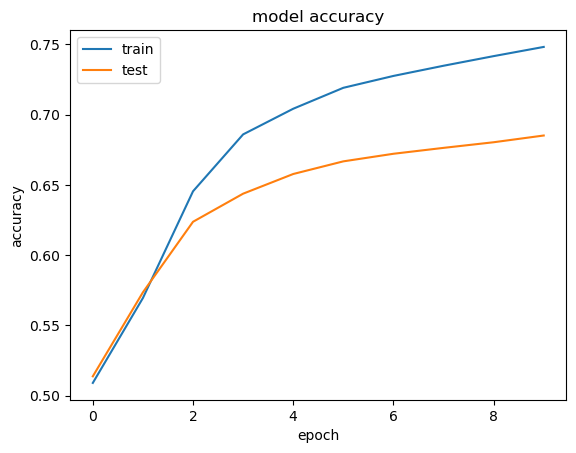

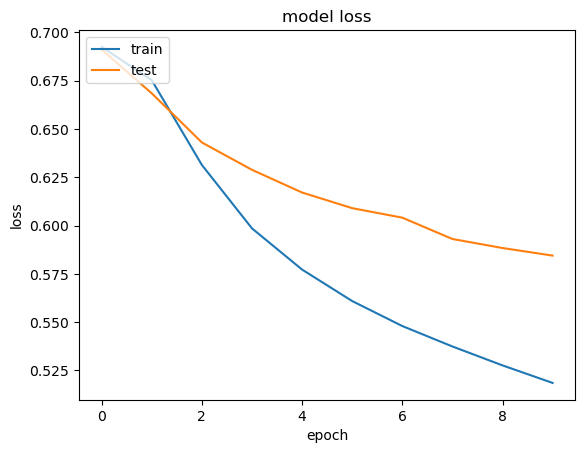

In [3]:
from keras.datasets import imdb
from keras import preprocessing
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()

# Định nghĩa các lớp layers
layer_1 = Embedding(10000, 8, input_length=maxlen)
layer_2 = Dense(8, activation = 'relu')
layer_3 = Dense(2, activation='relu')
layer_4 = Flatten()
output_layer = Dense(1, activation='sigmoid')

# Thêm các lớp layers vào mô hình sử dụng model.add(layer)
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(output_layer)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# 6.3 them 2 layer

Model 1 Summary:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 8)             8000      
                                                                 
 flatten_1 (Flatten)         (None, 80)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                1296      
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9441 (36.88 KB)
Trainable params: 9441 (36.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Non

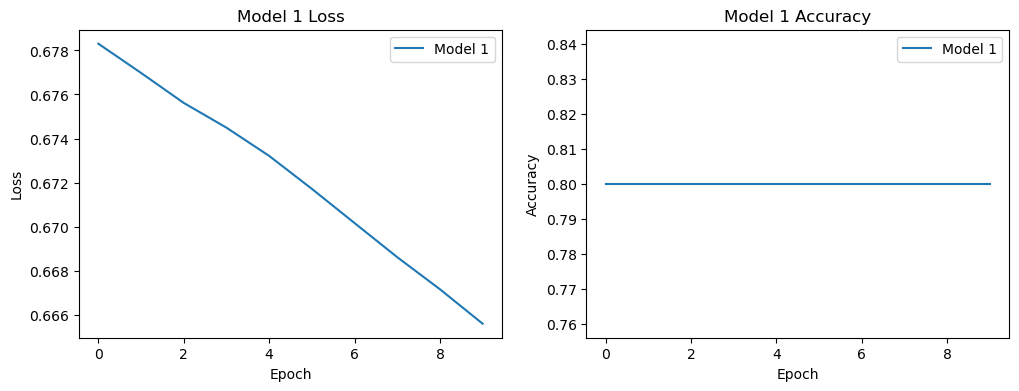

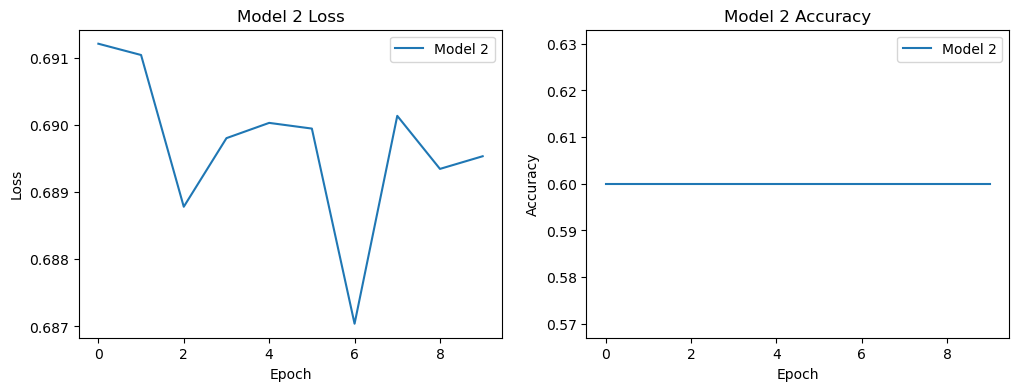

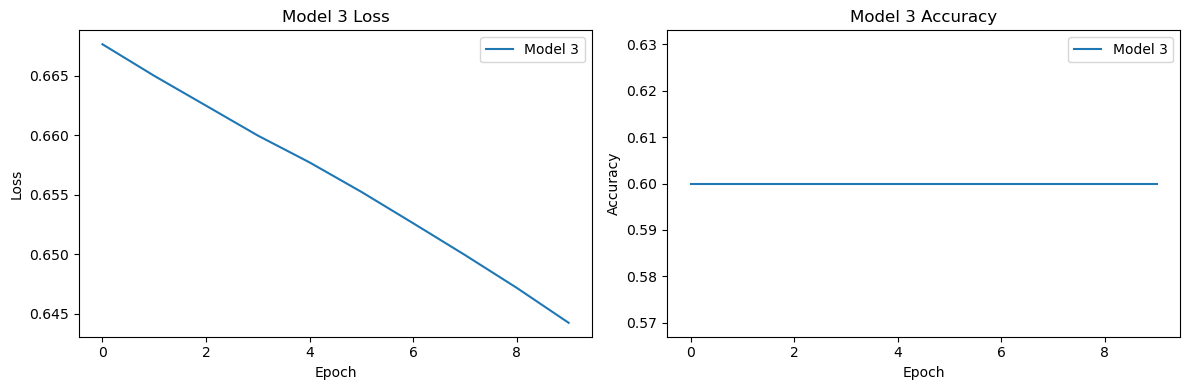

In [5]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Dữ liệu đánh giá nhà hàng và nhãn lớp (positive/negative)
reviews = ['The food was great!',
           'The service was terrible.',
           'I loved the ambiance.',
           'The food and service were excellent.',
           'Not a good experience.']

labels = np.array([1, 0, 1, 1, 0])

# Sử dụng Tokenizer để mã hóa văn bản thành các chuỗi số nguyên
max_words = 1000  # Số từ tối đa trong từ vựng
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

# Điền (padding) các chuỗi số nguyên để có độ dài tối đa
max_sequence_length = 10
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Xây dựng các mô hình mạng nơ-ron khác nhau

# Mô hình 1: Mô hình đơn giản
model1 = Sequential()
model1.add(Embedding(max_words, 8, input_length=max_sequence_length))
model1.add(Flatten())

model1.add(Dense(16, activation='relu'))
model1.add(Dense(8, activation='relu'))

model1.add(Dense(1, activation='sigmoid'))

# Mô hình 2: Mô hình với thêm lớp Dropout để tránh overfitting
model2 = Sequential()
model2.add(Embedding(max_words, 8, input_length=max_sequence_length))
model2.add(Flatten())
model2.add(Dense(4, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

# Mô hình 3: Mô hình với kiến trúc phức tạp hơn
model3 = Sequential()
model3.add(Embedding(max_words, 16, input_length=max_sequence_length))
model3.add(Flatten())
model3.add(Dense(8, activation='relu'))

model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

# Biên dịch và huấn luyện các mô hình
models = [model1, model2, model3]

for i, model in enumerate(models):
    print(f"Model {i + 1} Summary:")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())
    model.fit(padded_sequences, labels, epochs=10, verbose=0)
    loss, accuracy = model.evaluate(padded_sequences, labels, verbose=0)
    print(f"Accuracy (Model {i + 1}): {accuracy * 100}%")


# Số lượng mô hình
num_models = len(models)

# Biểu đồ loss và accuracy cho từng mô hình
for i, model in enumerate(models):
    # Huấn luyện mô hình (nếu chưa được huấn luyện)
    history = model.fit(padded_sequences, labels, epochs=10, verbose=0)
    
    # Lấy lịch sử (history) của mô hình
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    
    # Vẽ biểu đồ loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(loss, label=f'Model {i + 1}')
    plt.title(f'Model {i + 1} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Vẽ biểu đồ accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label=f'Model {i + 1}')
    plt.title(f'Model {i + 1} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

 # 7.6

In [1]:
5.1

5.1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


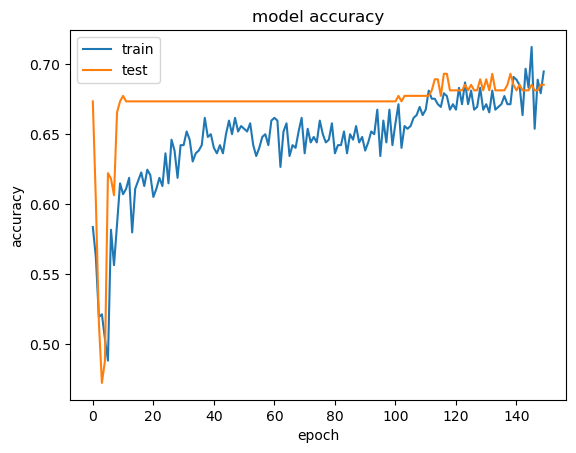

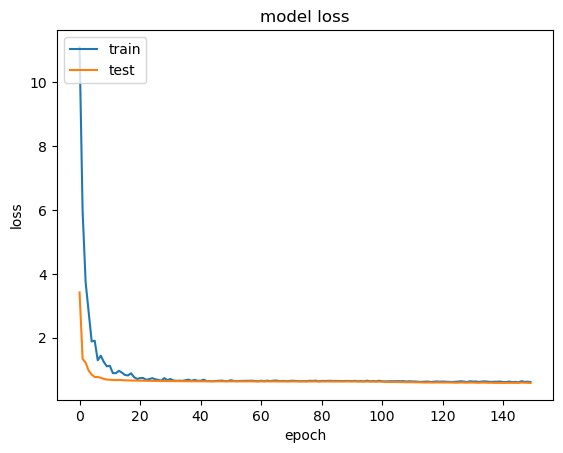

In [2]:
# Import các thư viện cần thiết
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dropout 

# Load dữ liệu từ tập tin "pima-indians-diabetes.csv" và chia thành input (X) và output (Y)
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:, 0:8]  # Sử dụng cột từ 0 đến 7 làm đặc trưng đầu vào
Y = dataset[:, 8]     # Sử dụng cột 8 làm đầu ra (output)

# Tạo mô hình Sequential, một kiến trúc mạng thần kinh tuần tự
model = Sequential()
#
model.add(Dense(12, input_dim=8, activation='relu'))  # Lớp ẩn với 12 đơn vị và hàm kích hoạt ReLU
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))              # Lớp ẩn với 8 đơn vị và hàm kích hoạt ReLU để giúp mô hình phi tuyến tính
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))           # Lớp đầu ra với hàm kích hoạt Sigmoid để đổi đầu ra các giá trị trong khoảng từ 0 tới 1, phù hợp cho bài toán nhị phân

# Compile mô hình: Chọn hàm mất mát, optimizer và các metric để theo dõi
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Đào tạo mô hình với dữ liệu huấn luyện
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# In ra tất cả các keys trong history (lịch sử đào tạo)
print(history.history.keys())

# Vẽ biểu đồ cho độ chính xác (accuracy) trên tập huấn luyện và tập kiểm tra
plt.plot(history.history['accuracy'])           # Độ chính xác trên tập huấn luyện
plt.plot(history.history['val_accuracy'])       # Độ chính xác trên tập kiểm tra (validation set)
plt.title('model accuracy')                     # Đặt tiêu đề biểu đồ
plt.ylabel('accuracy')                          # Đặt nhãn trục y
plt.xlabel('epoch')                             # Đặt nhãn trục x
plt.legend(['train', 'test'], loc='upper left') # Hiển thị chú thích (legend)
plt.show()                                      # Hiển thị biểu đồ

# Vẽ biểu đồ cho hàm mất mát (loss) trên tập huấn luyện và tập kiểm tra
plt.plot(history.history['loss'])               # Hàm mất mát trên tập huấn luyện
plt.plot(history.history['val_loss'])           # Hàm mất mát trên tập kiểm tra (validation set)
plt.title('model loss')                         # Đặt tiêu đề biểu đồ
plt.ylabel('loss')                              # Đặt nhãn trục y
plt.xlabel('epoch')                             # Đặt nhãn trục x
plt.legend(['train', 'test'], loc='upper left') # Hiển thị chú thích (legend)
plt.show()                                      # Hiển thị biểu đồ


In [3]:
5.2

5.2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dropout_2 (Dropout)         (None, 160)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6863 - acc: 0.5587 - val_loss: 0.6695 - val_acc: 0.6574
Epoch 2/10
625/6

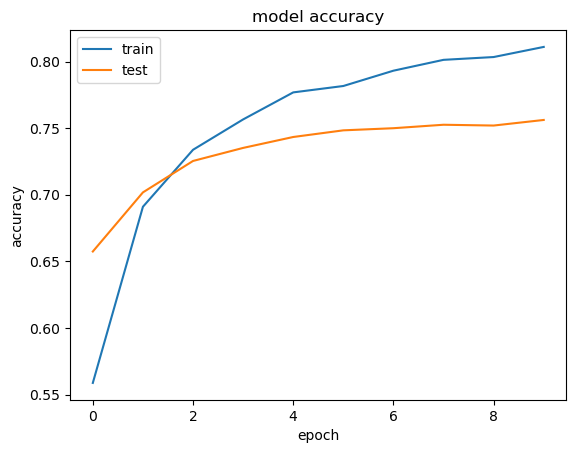

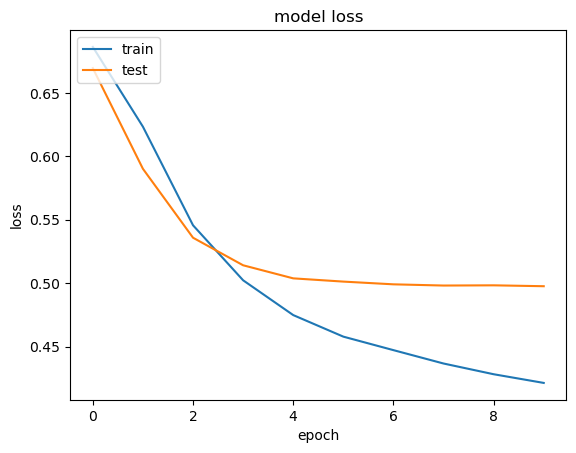

In [4]:
from keras.datasets import imdb
from keras import preprocessing
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dropout 

# Định nghĩa số lượng từ vựng tối đa và độ dài tối đa của mỗi đánh giá phim
max_features = 10000
maxlen = 20

# Tải dữ liệu IMDB và chia thành tập huấn luyện và tập kiểm tra
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Chuẩn bị dữ liệu bằng cách đảm bảo rằng mỗi đánh giá phim có cùng độ dài
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Xây dựng mô hình Sequential
model = Sequential()

# Thêm lớp Embedding để biểu diễn từ
model.add(Embedding(10000, 8, input_length=maxlen))

# Thêm lớp Flatten để chuyển đổi dữ liệu thành vector 1D
model.add(Flatten())

model.add(Dropout(0.5))

# Thêm lớp Dense với hàm kích hoạt sigmoid cho phân loại nhị phân
model.add(Dense(1, activation='sigmoid'))

# Biên soạn mô hình với optimizer, hàm mất mát và metric
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# In thông tin về kiến trúc của mô hình
model.summary()

# Đào tạo mô hình trên dữ liệu huấn luyện
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Vẽ biểu đồ độ chính xác trên tập huấn luyện và tập kiểm tra qua từng epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Vẽ biểu đồ hàm mất mát trên tập huấn luyện và tập kiểm tra qua từng epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
